# **Title** : Flipkart mobile dataset

# Importing modules

In [ ]:
import pandas as pd
import numpy as np
from bs4 import BeautifulSoup
import requests


# Collecting Data

Scrapping data about various mobile models and their specifications from flipkart website.<br>
https://www.flipkart.com/search?q=mobiles&as=on&as-show=on&otracker=AS_Query_HistoryAutoSuggest_1_1_na_na_na&otracker1=AS_Query_HistoryAutoSuggest_1_1_na_na_na&as-pos=1&as-type=HISTORY&suggestionId=mobiles&requestId=c53fdc82-88f7-4272-ab12-6ab7ff37a63f&as-searchtext=m

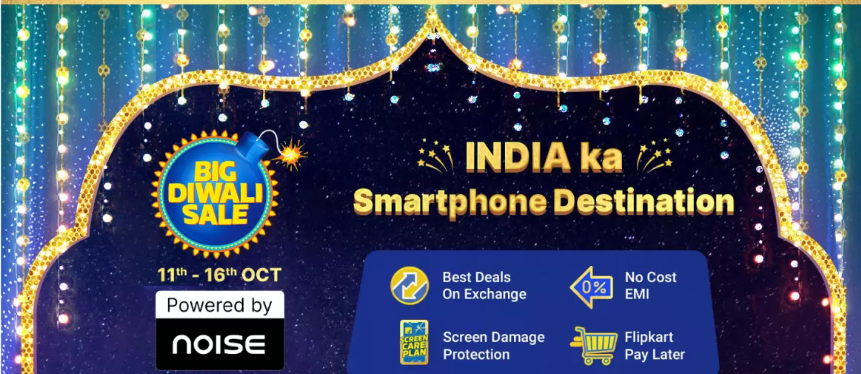

In [ ]:
final=pd.DataFrame()
for j in range(1,500):
    webpage=requests.get('https://www.flipkart.com/search?q=mobiles&otracker=search&otracker1=search&marketplace=FLIPKART&as-show=on&as=off&page={}'.format(j)).text
    soup=BeautifulSoup(webpage,'lxml')
    product=soup.find_all('div',class_='_2kHMtA')
    name=[]
    name_=[]
    rating=[]
    total_rating = []
    reviews=[]
    ram = []
    rom = []
    expandable = []
    display = []
    camera = []
    battery = []
    processor = []
    j=0
    for i in product:
        if j == 25:
            break
        else:
            name.append(i.find('div',class_='_4rR01T').text)
            if name[0].split()[0] == 'APPLE':
                try:
                    rating.append(i.find('div',class_='_3LWZlK').text.strip())
                except:
                    rating.append(np.nan)
                try:
                    total_rating.append(i.find_all('span',class_='_2_R_DZ')[0].text.strip().split()[0])
                except:
                    total_rating.append(np.nan)
                try:
                    reviews.append(i.find_all('span',class_='_2_R_DZ')[0].text.strip().split()[3])
                except:
                    reviews.append(np.nan)
                ram.append(np.nan)  
                expandable.append(np.nan)
                battery.append(np.nan)
                try:
                    rom.append(i.find_all('li',class_='rgWa7D')[0].text.strip())
                except:
                    rom.append(np.nan)
                try:
                    display.append(i.find_all('li',class_='rgWa7D')[1].text.strip())
                except:
                    display.append(np.nan)
                try:
                    camera.append(i.find_all('li',class_='rgWa7D')[2].text.strip())
                except:
                    camera.append(np.nan)
                try:
                    processor.append(i.find_all('li',class_='rgWa7D')[4].text.strip())
                except:
                    processor.append(np.nan)
                    
            else:
                try:
                    rating.append(i.find('div',class_='_3LWZlK').text.strip())
                except:
                    rating.append(np.nan)
                try:
                    total_rating.append(i.find_all('span',class_='_2_R_DZ')[0].text.strip().split()[0])
                except:
                    total_rating.append(np.nan)
                try:
                    reviews.append(i.find_all('span',class_='_2_R_DZ')[0].text.strip().split()[3])
                except:
                    reviews.append(np.nan)
                try:
                    ram.append(i.find_all('li',class_='rgWa7D')[0].text.strip().split('|')[0])
                except:
                    ram.append(np.nan)
                try:
                    rom.append(i.find_all('li',class_='rgWa7D')[0].text.strip().split('|')[1])
                except:
                    rom.append(np.nan)
                try:
                    expandable.append(i.find_all('li',class_='rgWa7D')[0].text.strip().split('|')[2])
                except:
                    expandable.append(np.nan)
                try:
                    display.append(i.find_all('li',class_='rgWa7D')[1].text.strip())
                except:
                    display.append(np.nan)
                try:
                    camera.append(i.find_all('li',class_='rgWa7D')[2].text.strip())
                except:
                    camera.append(np.nan)
                try:
                    battery.append(i.find_all('li',class_='rgWa7D')[3].text.strip())
                except:
                    battery.append(np.nan)
                try:
                    processor.append(i.find_all('li',class_='rgWa7D')[4].text.strip())
                except:
                    processor.append(np.nan)
        j=j+1

        df=pd.DataFrame({'name':name,
        'rating':rating,
        'total_rating':total_rating,
        'reviews':reviews,
        'ram':ram,
        'rom':rom,
        'expandable':expandable,
        'display':display,
        'camera':camera,
        'battery':battery,
        'processor':processor,
        })

    final=final.append(df,ignore_index=True)

Converting the scrapped data to a .csv file, named "mobile_details.csv"

In [ ]:
final.to_csv('mobile_details.csv', index=False, encoding='utf-8')

# Overview

**Through this dataset want to know,**<br>
1) Which mobile models have good ratings?<br>
2) What types of models are being offered by each mobile brand?<br>
3) What resolution of cameras are being offered in mobiles?<br>
4) How much battery capacity does various mobiles have?<br>
5) How much internal storage does various mobiles have?<br>



# Exploratory Data Analysis

## Setting up environment

In [ ]:
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (17, 7) #increase figure size

import seaborn as sns
sns.set(style='white', font_scale=2) #set style

import warnings
warnings.filterwarnings('ignore')

from scipy.stats import uniform, norm, bernoulli, poisson

#improve resolution
#comment this line if erroring on your machine/screen
%config InlineBackend.figure_format ='retina'


Reading the .csv file

In [ ]:
df_mobile = pd.read_csv("/content/mobile_details.csv")

Displaying the 4 top rows of our data.

In [ ]:
df_mobile.head()

Determining the shape of the dataset.

In [ ]:
df_mobile.shape

There are total 11976 rows and 11 columns in the dataset. 


## Decription of dataset<br>
**name** : Model name of mobile phone<br>
**rating** :  Average rating by the customers<br>
**total_rating** : Total number of ratings on the product<br>
**reviews** : Total number of reviews on the product<br>
**RAM** : Random access memory of mobile phone<br>
**ROM** : Read only memory of mobile phone<br>
**expandable** : Whether the mobile phone storage is expandable or not, and upto what size<br>
**display** : The size and type of display of mobile phone<br>
**camera** : Total number of cameras, and the resolution of each camera<br>
**battery** : Total battery capacity<br>
**processor** : Warranty of processor


In [ ]:
df_mobile.dtypes 

In [ ]:
df_mobile.info()

In [ ]:
x = df_mobile['rating'].value_counts()

Maximum number of mobiles have 4.3 star rating.

In [ ]:
df_mobile['rom'].value_counts()

Maximum number of mobiles have 64 GB internal storage memory.

In [ ]:
df_mobile['expandable'].value_counts()

Maximum number of mobiles have expandable memory storage upto 512 GB.

In [ ]:
df_mobile['ram'].value_counts()

Maximum number of mobiles have 32 MB RAM.

In [ ]:
df_mobile['camera'].value_counts()

Maximum number of mobiles have 0.8MP Rear Camera.

In [ ]:
df_mobile['battery'].value_counts()

Maximum number of mobiles have 5000 mAh Battery.

In [ ]:
null_rows = df_mobile.isnull().any(axis=1)
df_mobile[null_rows]

In [ ]:
sum(null_rows)

There are 6544 mobile models that have atleast one unknown value.

In [ ]:
df_mobile.describe(include = 'all')

# Descriptive Data Analysis

In [ ]:
# columns with missing values
df_mobile.columns[df_mobile.isnull().any(axis=0)]

In [ ]:
# number of missing values by column
df_mobile.isnull().sum()

In [ ]:
df_mobile['rating'].skew()

In [ ]:
df_mobile['rating'].kurt()

In [ ]:
dat = uniform.rvs(size=10000)
sns.histplot(dat, bins=20);

In [ ]:
# loc specifies mean
# scale specifies the standard deviation
dat = norm.rvs(loc=0, scale=1, size=10000)
sns.histplot(dat, bins=20);

In [ ]:
loc1, scale1, size1 = (90, 5, 175)
loc2, scale2, size2 = (70, 5, 175)
bi = np.concatenate([np.random.normal(loc=loc1, scale=scale1, size=size1), 
                     np.random.normal(loc=loc2, scale=scale2, size=size2)])
sns.histplot(bi, bins=20);

In [ ]:
r = bernoulli.rvs(0.2 , size=10000)
sns.countplot(r, color='#7995C3');